# Chapter 4. Regression and prediction

Question: Is the variable X (or more likely, X1, ...,Xp) associated with a variable Y, and if so, what is the relationship and can we use it to predict Y?”

## 4.1 Simple linear regression

**Correlation and regression**: Simple linear regression provides a model of the relationship between the magnitude of one variable and that of a second - for example, as X increases, Y also increases. Or as X increases, Y decreases. Correlation is another way to measure how two variables are related. The difference is that while correlation measures the strength of an association between two variables, regression quantifies the nature of the relationship

Response: The variable we are trying to predict, also known as dependent variable, Y variable, target, outcome

Independent variable: The variable used to predict the response, X variable, feature, attribute, predictor

Record: The vector of predictor and outcome values for a specific individual or case, row, case, instance, example

Intercept: The intercept of the regression line, the predicted value when X = 0

Regression coefficient: The slope of the regression line, slope, parameter estimates, weights 

Fitted values: The estimates Y obtained from the regression line, predicted values 

Residuals: The difference between the observed values and the fitted values 

Least squares: The method of fitting a regression by minimizing the sum of squared residuals, ordinary least squares, OLS

### The regression equation

Y = b0 + b1X

In [12]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

lung = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/LungDisease.csv')
lung

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1
...,...,...
117,450,22
118,490,22
119,500,22
120,370,23


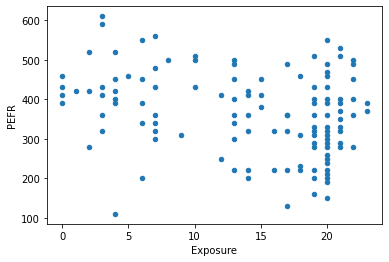

In [20]:
lung.plot.scatter('Exposure', 'PEFR')

In [14]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


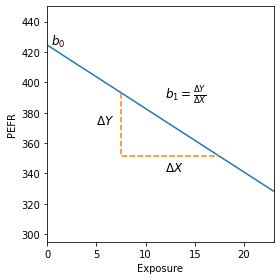

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict([[0], [23]]))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = [[7.5], [17.5]]
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

### Fitted values and residuals

Yi = b0 + b1Xi + ei

ˆYi = ˆb0 +ˆb1Xi

ei = Yi − ˆYi

**Hat notation: estimates versus known values**: The hat notation is used to differentiate between estimates and know values. The estimate has uncertainty, whereas the true value is fixed 

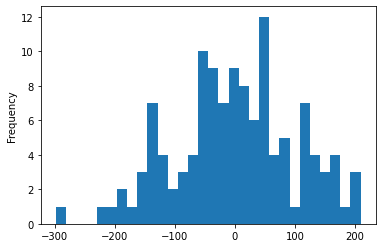

In [31]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted
residuals.plot.hist(bins = 30)

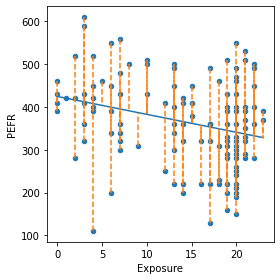

In [26]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

### Least squares

**Residual sum of squares**: RSS = nΣi=1(Yi − ˆYi)^2 = nΣi=1(Yi −ˆb0 −ˆb1Xi)^2

The regression line is the estimate that minimizes the sum of squared residual values. The estimates ˆb0 and ˆb1 are the values that minimize RSS

The method of minimizing the sum of the squared residuals is termed least squares regression, or ordinary least squares (OLS) regression.

**Regression terminology**: When analysts and researchers use the term regression by itself, they are typically referring to linear regression; the focus is usually on developing a linear model to explain the relationship between predictor variables and a numeric outcome variable. In its formal statistical sense, regression also includes nonlinear models that yield a functional relationship between predictors and outcome variables. In the machine learning community, the term is also occasionally used loosely to refer to the use of any predictive model that produces a predicted numeric outcome (as opposed to classification methods that predict a binary or categorical outcome).

### Prediction versus explanation (profiling)

Explain: A primary use of regression is to illuminate a supposed linear relationship between predictor variables and an outcome variable.

Predict: Also regression is widely used to form a model to predict individual outcomes for new data rather than explain data in hand.

Causation: The regression equation does not prove the direction of causation

## 4.2 Multiple linear regression

Y = b0 + b1X1 + b2X2 + ... + bpXp + e

RMSE - Root mean squared error: The square root of the average squared error of the regression (this is most widely used metric to compare regression models)

RSE - Residual standard error: The same as the root mean squared error, but adjusted for degrees of freedom

R-squared: The proportion of variance explained by the model, from 0 to 1

t-statistic: The coefficient for a predictor, divided by the standard error of the coefficient, giving a metric to compare the importance of variables in the model

### Example: king county housing data

In [33]:
house = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/house_sales.csv',
                    sep='\t')
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [34]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [46]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:') 
for name, coef in zip(predictors, house_lm.coef_):
    print(f'{name} :{coef}')

Intercept: -521871.368
Coefficients:
SqFtTotLiving :228.8306036024074
SqFtLot :-0.06046682065303883
Bathrooms :-19442.840398321023
Bedrooms :-47769.95518521431
BldgGrade :106106.96307898095


**Interpretation**: the predicted value ˆY changes by the coefficient bj for each unit change in Xj assuming all the other variables, Xk for k ≠ j, remain the same

### Assessing the model

RMSE - Root mean squared error - the square root of the average squared error in the predicted y values

This measures the overall accuracy of the model and is a basis for comparing it to other models 

RSE - Residual standard error - adjusted for degrees of freedom

In [48]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)

print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [50]:
import statsmodels.api as sm
model = sm.OLS(house[outcome], house[predictors].assign(const = 1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:02:46   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared**: range from 0 to 1 and measures the proportion of variation in the data that is accounted for in the model

**adjusted R-squared**: adjusts for the degrees of freedom, effectively penalizing the addition of more predictors to a model

**t-statistic and p-value**: the t-statistic and its mirror image, the p-value, measures the extent to which a coefficient is statistically significant, that is, outside the range of what a random chance arrangement of predictor and target variable might produce. The higher the t-statistic (and the lower the p-value), the more significant the predictor. 

In addition to the t-statistic, R and other packages will often report a p-value (Pr(>|t|) in the R output) and F-statistic. Data scientists do not generally get too involved with the interpretation
of these statistics, nor with the issue of statistical significance. Data scientists primarily focus on the t-statistic as a useful guide for whether to include a predictor in a model or not. High t-statistics (which go with p-values near 0) indicate a predictor should be retained in a model, while very low t-statistics indicate a predictor could be dropped.

### Cross-validation

Classic statistical regression metrics (R^2, F-statistics, and p-values) are all “in-sample” metrics—they are applied to the same data that was used to fit the model. Intuitively, you can see that it would make a lot of sense to set aside some of the original data, not use it to fit the model, and then apply the model to the set-aside (holdout) data to see how well it does. Normally, you would use a majority of the data to fit the model and use a smaller portion to test the model.

**k-fold cross-validation algorithm**:
1. Set aside 1/k of the data as a holdout sample
2. Train the model on the remaining data
3. Apply (score) the model to the 1/k holdout, and record needed model assessment metrics 
4. Restore the first 1/k of the data, and set aside the next 1/k (excluding any records that got picked the first time)
5. Repeat steps 2 and 3
6. Repeat until each record has been used in the holdout portion
7. Average or otherwise combine the model assessment metrics

### Model selection and stepwise regression

In [52]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:25:59   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

**In-sample metrics**

Including additional variables always reduces RMSE and increase R^2 for the training data

adjusted R^2

AIC (Akaike’s Information Criteria) = 2P + n log(RSS/n), where P is the number of variables and n is the number of records. The goal is to find the model that minimizes AIC; models with k more extra variables are penalized by 2k.

AICc, A version of AIC corrected for small sample sizes

BIC (Bayesian information criteria). Similar to AIC, with a stronger penalty for including additional variables to the model.

Mallows Cp, A variant of AIC developed by Colin Mallows

These are typically reported as in-sample metrics (i.e., on the training data), and data scientists using holdout data for model assessment do not need to worry about the differences among them or the underlying theory behind them

**stepwise regression**

In [59]:
from dmba import stepwise_selection
from dmba import AIC_score

y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df = 1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose = True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f'{name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None
Intercept: 6178645.017
Coefficients:
SqFtTotLiving: 199.2775530420154
BldgGrade: 137159.5602262004
YrBuilt: -3565.424939249331
Bedrooms: -51947.38367361374
Bathrooms: 42396.16452771891
PropertyType_Townhouse: 84479.16203300106
SqFtFinBasement: 7.046974967571178
PropertyType_Single Family: 22912.05518701787


**Penalized regression (ridge and lasso regression)**: instead of explicitly searching through a discrete set of models, the model-fitting equation incorporates a constraint that penalizes the model for too many variables (parameters)

In linear regression, overfitting is typically not a major issue, due to the simple (linear) global structure imposed on the data. For more sophisticated types of models, particularly iterative procedures that respond to local data structure, cross-validation is a very important tool

### Weighted regression

Data scientists may find weighted regression useful in two cases:
1. Inverse-variance weighting when different observations have been measured with different precision, the higher variance ones receiving lower weights
2. Analysis of data where rows represent multiple cases, the weight variable encodes how many original observations each row represents

For example, with the housing data, older sales are less reliable than more recent sales. compute a weight as the number of years since 2005 

In [61]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [65]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight = house.Weight)
house_wt.coef_

array([ 2.45024089e+02, -2.92414748e-01, -2.60859701e+04, -5.36088764e+04,
        1.15242435e+05])

## 4.3 Prediction using regression

Prediction interval: An uncertainty interval around an individual predicted value

Extrapolation: Extension of a model beyond the range of the data used to fit it

### The dangers of extrapolation

Regression models should not be used to extrapolate beyond the range of the data. The model is valid only for predictor values for which the data has sufficient values 

### Confidence and prediction intervals

**Confidence intervals**: an uncertainty intervals placed around regression coefficients and predictions

**Bootstrap algorithm** for generating confidence intervals for regression parameters (coefficients) for a data set with P predictors and n records (rows):
1. Consider each row (including outcome variable) as a single 'ticket' and place all the n tickets in a box 
2. Draw a ticket at random. record the values, and replace it in the box
3. Repeat step 2 n times, you now have one bootstrap resample
4. Fit a regression to the bootstrap sample, and record the estimated coefficients 
5. Repeat steps 2 through 4, say, 1000 times 
6. You now have 1000 bootstrap values for each coefficient. Find the appropriate percentiles for each one (e.g. 5th and 95th for a 90% confidence interval)

The uncertainty around predicted y values comes from two sources:
1. Uncertainty about what the relevant predictor variables and their coefficients are 
2. Additional error inherent in individual data points

The individual data point error can be thought of as: even if we knew for certain what the regression equation was (e.g. if we had a huge number of records to fit it), the actual outcome values for a given set of predictor values will vary

**Bootstrap algorithm** for modeling both the regression model error and the individual data point error:
1. Take a bootstrap sample from the data 
2. Fit the regression, and predict the new value 
3. Take a single residual at random from the original regression fit, add it to the predicted value, and record the result 
4. Repeat steps 1 through 3, say 1000 times 
5. Find the 2.5th and the 97.5th percentiles of the results 

**Prediction interval vs confidence interval**: 
1. Confidence intervals quantify uncertainty around regression coefficients
2. Prediction intervals quantify uncertainty in individual predictions
3. The bootstrap can also be used to produce prediction and confidence intervals, the interpretation and idea are the same

A prediction interval pertains to uncertainty around a single value, while a confidence interval pertains to a mean or other statistic calculated from multiple values. Thus, a prediction interval will typically be much wider than a confidence interval for the same value. 

## 4.4 Factor variables in regression

Factor variables, also termed categorical variables, take on a limited number of discrete values

Regression requires numerical inputs, so factor variables need to be recoded to use in the model

Dummy variables: Binary 0-1 variables derived by recoding factor data for use in regression and other models 

Reference coding: The most common type of coding used by statisticians, in which one level of a factor is used as a reference and other factors are compared to that level

One hot encoder: A common type of coding used in the machine learning community in which all factor levels are retained. While useful for certain machine learning algorithms, this approach is not appropriate for multiple linear regression

Deviation coding: A type of coding that compares each level against the overall mean as opposed to the reference level

### Dummy variables representation

In [73]:
house.PropertyType.value_counts()

Single Family    20720
Townhouse         1710
Multiplex          257
Name: PropertyType, dtype: int64

In [71]:
pd.get_dummies(house['PropertyType']).head(10)

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0
6,0,0,1
7,0,1,0
8,0,1,0
9,0,1,0
10,1,0,0


In [74]:
pd.get_dummies(house['PropertyType'], drop_first = True).head(10)

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,1,0
8,1,0
9,1,0
10,0,0


The keyword argument drop_first will return P-1 columns, use this to avoid the problem of multicollinearity

In certain machine learning algorithms such as nearest neighbors and tree models, one hot encoding is the standard way to represent factor variables 

In the regression setting, a factor variable with P distinct levels is usually represented by a matrix with only P – 1 columns. This is because a regression model typically includes an intercept term. With an intercept, once you have defined the values for P – 1 binaries, the value for the Pth is known and could be considered redundant. Adding the Pth column will cause a multicollinearity error

In [78]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType']
X = pd.get_dummies(house[predictors], drop_first = True)
X.head()

,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,PropertyType_Single Family,PropertyType_Townhouse
1,2400,9373,3.00,6,7,0,0
2,3764,20156,3.75,4,10,1,0
3,2060,26036,1.75,4,8,1,0
4,3200,8618,3.75,5,7,1,0
5,1720,8620,1.75,4,7,1,0


In [79]:
house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f'{name}: {coef}')

Intercept: -446841.366
Coefficients:
SqFtTotLiving: 223.37362892503782
SqFtLot: -0.07036798136812368
Bathrooms: -15979.013473415225
Bedrooms: -50889.732184830136
BldgGrade: 109416.30516146185
PropertyType_Single Family: -84678.2162954924
PropertyType_Townhouse: -115121.97921609174


**Different factor codings**: There are several different ways to encode factor variables, known as contrast coding systems. For example, deviation coding, also known as sum contrasts, compares each level against the overall mean/ Another contrast is polynomial coding, which is appropriate for ordered factors. With the exception of ordered factors, data scientists will generally not encounter any type of coding besides reference coding or one hot encoder

### Factor variables with many levels

Some factor variables can produce a huge number of binary dummies - zip codes are a factor variable, and there are 43000 zip codes in the US. In such cases, it is useful to explore the data, and the relationship between predictor variables and the outcome, to determine whether useful information is contained in the categories. If so, you must further decide whether it is useful to retain all factors, or whether the levels should be consolidated 

In [80]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98043,98068,98113
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In some problems, you can consolidate a zip code using the first two or three digits, corresponding to a submetropolitan geographic region

An alternative approach is to group the zip codes according to another variable, such as sale price. Even better is to form zip code groups using the residuals from an initial model

In [86]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])


zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

0    16
1    16
2    16
3    16
4    16
Name: ZipGroup, dtype: int64


In [87]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

Consolidates the 80 zip codes into five groups based on the median of the residual from the house_lm regression. The median residual is computed for each zip, and then split the zip codes, sorted by the median, into five groups

The concept of using the residuals to help guide the regression fitting is a fundamental step in the modeling process

### Ordered factor variables

Ordered factor variables can be converted to numerical values and used as is.

For example, the load grade could be A, B, C, and so on - each grade carries more risk than the prior grade

In [94]:
house.BldgGrade.value_counts()

7     9501
8     6257
9     2825
6     2109
10    1206
11     439
5      198
12     121
13      18
4       12
3        1
Name: BldgGrade, dtype: int64

Treating ordered factors as a numeric variable preserves the information contained in the ordering that would be lost if it were converted to a factor

## 4.5 Interpreting the regression equation

### Correlated predictors

In multiple regression, the predictor variables are often correlated with each other. When the predictor variables are highly correlated, it is difficult to interpret the individual coefficients, and can inflate the standard error of the estimates

In [95]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f'{name}: {coef}')

Intercept: 6178645.017
Coefficients:
SqFtTotLiving: 199.2775530420154
BldgGrade: 137159.5602262004
YrBuilt: -3565.424939249331
Bedrooms: -51947.38367361374
Bathrooms: 42396.16452771891
PropertyType_Townhouse: 84479.16203300106
SqFtFinBasement: 7.046974967571178
PropertyType_Single Family: 22912.05518701787


The coefficient for Bedrooms is negative! This implies that adding a bedroom to a house will reduce its value.This is because the predictor variables are correlated: larger houses tend to have more bedrooms, and it is the size that drives house value, not the number of bedrooms. The variables for bedrooms, house size, and number of bathrooms are all correlated

In [96]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first = True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])

print(f'Intercept: {reduced_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 4913973.344
Coefficients:
 Bedrooms: 27150.537230214795
 BldgGrade: 248997.79366213776
 YrBuilt: -3211.7448621550716
 PropertyType_Single Family: -19898.49534050224
 PropertyType_Townhouse: -47355.436873344675


### Multicollinearity

An extreme case of correlated variables produces multicollinearity - a condition in which there is redundance among the predictor variables. Perfect multicollinearity occurs when one predictor variable can be expressed as a linear combination of others. Multicollinearity occurs when:
1. A variable is included multiple times by error
2. P dummies, instead of P-1 dummies, are created from a factor variable 
3. Two variables are nearly perfectly correlated with one another 

Multicollinearity is not such a problem for nonlinear regression methods like trees, clustering, and nearest-neighbors, and in such methods it may be advisable to retain P dummies instead of P-1. That said, even in those methods, nonredundancy in predictor variables is still a virtue

### Confounding variables 

With correlated variables, the problem is one of commission: including different variables that have a similar predictive relationship with the response. With confounding variables, the problem is one of omission: an important variable is not included in the regression equation. Naive interpretation of the equation coefficients can lead to invalid conclusions 

In [97]:
# location is a very important predictor of house prise. Add ZipGroup as a location variable 
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first = True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f'{name}: {coef}')

Intercept: -666637.469
Coefficients:
SqFtTotLiving: 210.6126600558018
SqFtLot: 0.45498713854660255
Bathrooms: 5928.425640001682
Bedrooms: -41682.871840744934
BldgGrade: 98541.18352725956
PropertyType_Single Family: 19323.625287919665
PropertyType_Townhouse: -78198.72092762368
ZipGroup_1: 53317.17330659815
ZipGroup_2: 116251.58883563579
ZipGroup_3: 178360.53178793384
ZipGroup_4: 338408.6018565202


### Interaction and main effects

Main effects are what are often referred to as the predictor variables in the regression equation. An implicit assumption when only main effects are used in a model is that the relationship between a predictor variable and the response is independent of the other predictor variables. This is often not the case.

In [99]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'AdjSalePrice ~ SqFtTotLiving * ZipGroup + SqFtLot + Bathrooms + Bedrooms + BldgGrade + PropertyType', data = house)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Mon, 15 Jun 2020   Prob (F-statistic):               0.00
Time:                        08:25:38   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.853e+05   2.05e+04    -23.701      0.000   -5.25e+05   -4.45e+05
ZipGroup[T.1]                 -1.113e+04   1.34e+04     -0.830      0.407   -3.74e+04    1.52e+04
ZipGroup[T.2]                  2.032e+04   1.18e+04      1.717      0.086   -2877.441    4.35e+04
ZipGroup[T.3]                   2.05e+04   1.21e+04      1.697      0.090   -3180.870    4.42e+04
ZipGroup[T.4]                 -1.499e+05   1.13e+04    -13.285      0.000   -1.72e+05   -1.28e+05
PropertyType[T.Single Family]  1.357e+04   1.39e+04      0.975      0.330   -1.37e+04    4.09e+04
PropertyType[T.Townhouse]     -5.884e+04   1.51e+04     -3.888      0.000   -8.85e+04   -2.92e+04
SqFtTotLiving                   114.7650      4.863     23.600      0.000     105.233     124.297
SqFtTotLiving:ZipGroup[T.1]      32.6043      5.712      5.708      0.000      21.409      43.799
SqFtTotLiving:ZipGroup[T.2]      41.7822      5.187      8.056      0.000      31.616      51.948
SqFtTotLiving:ZipGroup[T.3]      69.3415      5.619     12.341      0.000      58.329      80.354
SqFtTotLiving:ZipGroup[T.4]     226.6836      4.820     47.032      0.000     217.237     236.131
SqFtLot                           0.6869      0.052     13.296      0.000       0.586       0.788
Bathrooms                     -3619.4533   3202.296     -1.130      0.258   -9896.174    2657.267
Bedrooms                       -4.18e+04   2120.279    -19.715      0.000    -4.6e+04   -3.76e+04
BldgGrade                      1.047e+05   2069.472     50.592      0.000    1.01e+05    1.09e+05
==============================================================================
Omnibus:                    30927.394   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34361794.502
Skew:                           7.279   Prob(JB):                         0.00
Kurtosis:                     193.101   Cond. No.                     5.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model selection with interaction terms**: In problems involving many variables
1. In some problems, prior knowledge and intuition can guide the choice of which interaction terms to include in the model
2. Stepwise selection can be used to sift through the various models 
3. Penalized regression can automatically fit to a large set of possible interaction terms 
4. Perhaps the most common approach is to use tree models, as well as their descendants, random forest and gradient boosted trees. This class of models automatically searches for optimal interaction terms 

## 4.6 Regression diagnostics

**Terminologies**

Standardized residuals: Residuals divided by the standard error of the residuals

Outliers: Records (or outcome values) that are distant from the rest of the data (or the predicted outcome)

Influential value: A value or record whose presence or absence makes a big difference in the regression equation

Leverage: the degree of influence that a single record has on a regression equation

Non-normal residuals: Non-normally distributed residuals can invalidate some technical requirements of regression but are usually not a concern in data science

Heteroskedasiticy: When some ranges of the outcome experience residuals with higher variance (may indicate a predictor missing from the equation)

Partial residual plots: a diagnostic plot to illuminate the relationship between the outcome variable and a single predictor

### Outliers

An extreme value that is distant from most of the other observations. Outliers need to be handled for estimates of location and variability. Outliers can cause problems with regression models.

In regression, an outlier is a record whose actual y value is distant from the predicted value

In regression, the standardized residual is the metric that is typically used to determine whether a record is classified as an outlier. Standardized residuals can be interpreted as the number of standard errors away from the regression line

In [102]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = ['AdjSalePrice']

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const = 1))
result_98105 = house_outlier.fit()
result_98105.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          1.69e-103
Time:                        10:56:11   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587      0.000     161.574     257.631
SqFtLot          38.9333      5.330      7.305      0.000      28.445      49.421
Bathrooms      2282.2641      2e+04      0.114      0.909    -3.7e+04    4.16e+04
Bedrooms      -2.632e+04   1.29e+04     -2.043      0.042   -5.17e+04    -973.867
BldgGrade        1.3e+05   1.52e+04      8.533      0.000       1e+05     1.6e+05
const         -7.725e+05   9.83e+04     -7.861      0.000   -9.66e+05   -5.79e+05
==============================================================================
Omnibus:                       82.127   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              586.561
Skew:                           0.859   Prob(JB):                    4.26e-128
Kurtosis:                       9.483   Cond. No.                     5.63e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()

(24333, -4.326731804078567)

In [105]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice AdjSalePrice    119748
Name: 24333, dtype: object
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms           3
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


### Influential values

A value whose absence would significantly change the regression equation is termed an influential observation. In regression, such a value need not to be associated with a large residual

**Hat-value**: a measure of high leverage data

<ipython-input-107-0bcc6f1869e5>:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


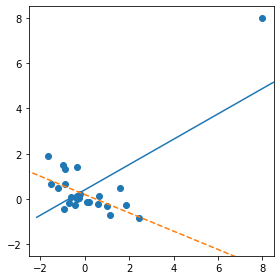

In [107]:
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

**Cook's distance**: defines influence as a combination of leverage and residual size

**Influence plot or bubble plot**: A plot combines standardized residuals, the hat-value, and Cook's distance in a single plot

Text(0, 0.5, 'studentized residuals')

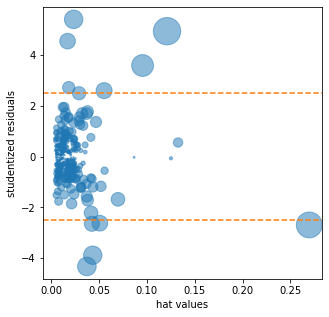

In [109]:
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize = (5,5))
ax.axhline(-2.5, linestyle = '--', color = 'C1')
ax.axhline(2.5, linestyle = '--', color = 'C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, s = 1000 * np.sqrt(influence.cooks_distance[0]),
           alpha = 0.5)
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

The hat values are plotted on the x-axis, the residuals are plotted on the y-axis, and the size of the points is related to the value of Cook’s distance.

For purposes of fitting a regression that reliably predicts future data, identifying influential observations is useful only in smaller data sets. For regressions involving many records, it is unlikely that any one observation will carry sufficient weight to cause extreme influence on the fitted equation (although the regression may still have big outliers). For purposes of anomaly detection though, identifying influential observations can be very useful

### Heteroskedasticity, non-normality and correlated errors 

The distribution of the residuals is relevant mainly for the validity of formal statistical inference (hypothesis tests and p-values), which is of minimal importance to data scientists concerned mainly with predictive accuracy. Normally distributed errors are a sign that the model is complete. Errors that are not normally distributed indicate the model may be missing something. For formal inference to be fully valid, the residuals are assumed to be normally distributed, have the same variance, and be independent. One area where this may be of concern to data scientists is the standard calculation of confidence intervals for predicted values, which are based upon the assumptions about the residuals

Heteroskedasticity is the lack of constant residual variance across the range of the predicted values. In other words, errors are greater for some portions of the range than for others. Visualizing the data is a convenient way to analyze residuals

Text(0, 0.5, 'abs(residual)')

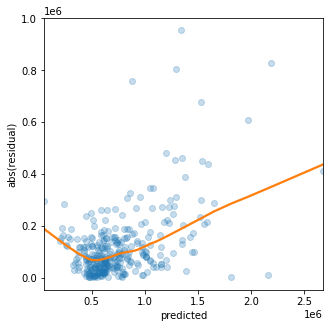

In [111]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (5,5))
sns.regplot(result_98105.fittedvalues,
            np.abs(result_98105.resid),
            scatter_kws = {'alpha': 0.25}, 
            line_kws = {'color': 'C1'},
            lowess = True,
            ax = ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

The variance of the residuals tends to increase for higher-valued homes but is also large for lower-valued homes

Why would a data scientist care about heteroskedasticity: Heteroskedasticity indicates that prediction errors differ for different ranges of the predicted value, and may suggest an incomplete model. For example, the heteroskedasticity in lm_98105 may indicate that the regression has left something unaccounted for in high and low rang homes 

<ipython-input-115-dffacc2fce59>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


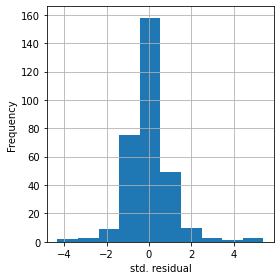

In [115]:
fig, ax = plt.subplots(figsize=(4, 4))
pd.Series(influence.resid_studentized_internal).hist(ax=ax)
ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The distribution has decidedly longer tails than the normal distribution and exhibits mild skewness toward larger residuals

**Independence**: Statisticians may also check the assumption that the errors are independent. This is particular true for data that is collected over time or space. The Durbin-Watson statistic can be used to detect if there is significant autocorrelation in a regression involving time series data. If the errors from a regression model are correlated, then this information can be useful in making short-ter, forecasts and should be built into the model. If longer-term forecasts or explanatory models are the goal, excess autocorrelated data at the microlevel may distract. In that case, smoothing, or less granular collection of data in the first place, may be in order

However, satisfying distributional assumptions simply for the sake of validating formal statistical inference (p-values, F-statistics, etc) is not that important for the data scientist

**Scatter plot smoothers**: In evaluating a regression model, it is useful to use a scatterplot smoother to visually highlight relationships between two variables

### Partial residual plots and nonlinearity

Partial residual plots are a way to visualize how well the estimated fit explains the relationship between a predictor and the outcome. The basic idea of a partial residual plot is to isolate the relationship between a predictor variable and the response, taking into account all of the other predictor variables. A partial residual might be thought as a 'synthetic outcome' value, combining the prediction based on a single predictor with the actual residual from the full regression equation. A partial residual for predictor Xi is the ordinary residual plus the regression term associated with Xi: Partial residual = Residual + ^biXi

<ipython-input-118-a623b61cf2d5>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


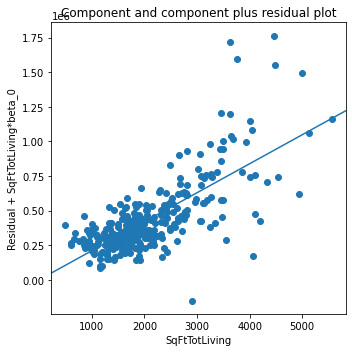

In [118]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.tight_layout()
plt.show()

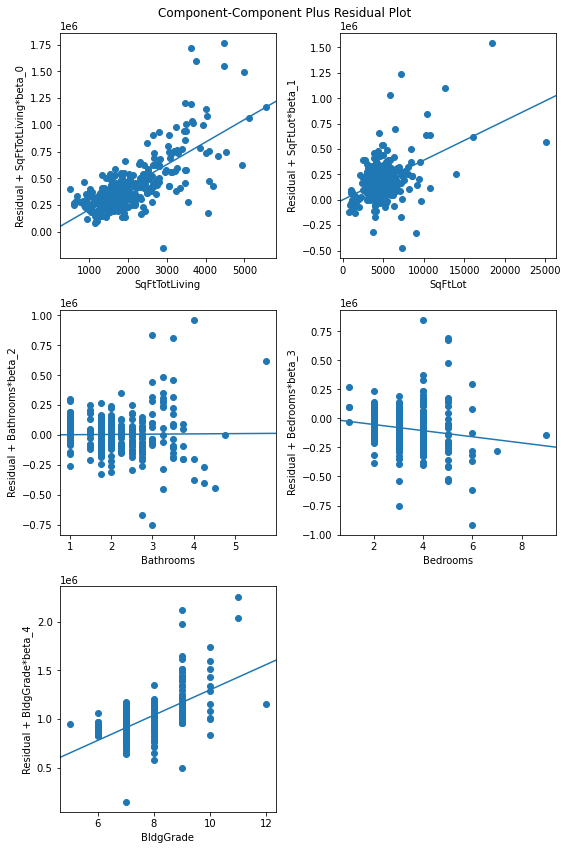

In [119]:
fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

## 4.7 Polynomial and spline regression

### Polynomial

In [121]:
model_poly = smf.ols(formula = 'AdjSalePrice ~ SqFtTotLiving + I(SqFtTotLiving**2) + SqFtLot + Bathrooms + Bedrooms + BldgGrade', 
                     data = house_98105)
result_poly = model_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          9.95e-106
Time:                        13:15:00   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving             7.4521     55.418      0.134      0.893    -101.597     116.501
I(SqFtTotLiving ** 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                  32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms             -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms              -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade              1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

0.03879128168237239


<ipython-input-122-061b848bb55c>:28: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


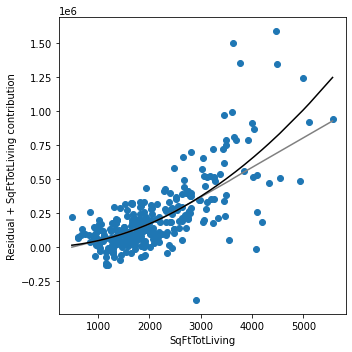

In [122]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[2])

### Splines

The technical definition of a spline is a series of piecewise continuous polynomials

The polynomial pieces are smoothly connected at a series of fixed points in a predictor variable. referred to as knots

In [123]:
formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df = 6, degree = 3) + SqFtLot + Bathrooms + Bedrooms + BldgGrade'
model_spline = smf.ols(formula = formula, data = house_98105)
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          7.10e-104
Time:                        13:27:10   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -4.142e+05   1.43e+05     -2.899      0.004   -6.95e+05   -1.33e+05
bs(SqFtTotLiving, df=6, degree=3)[0] -1.995e+05   1.86e+05     -1.076      0.283   -5.65e+05    1.66e+05
bs(SqFtTotLiving, df=6, degree=3)[1] -1.206e+05   1.23e+05     -0.983      0.326   -3.62e+05    1.21e+05
bs(SqFtTotLiving, df=6, degree=3)[2] -7.164e+04   1.36e+05     -0.525      0.600    -3.4e+05    1.97e+05
bs(SqFtTotLiving, df=6, degree=3)[3]  1.957e+05   1.62e+05      1.212      0.227   -1.22e+05    5.14e+05
bs(SqFtTotLiving, df=6, degree=3)[4]  8.452e+05   2.18e+05      3.878      0.000    4.16e+05    1.27e+06
bs(SqFtTotLiving, df=6, degree=3)[5]  6.955e+05   2.14e+05      3.255      0.001    2.75e+05    1.12e+06
SqFtLot                                 33.3258      5.454      6.110      0.000      22.592      44.059
Bathrooms                            -4778.2080   1.94e+04     -0.246      0.806    -4.3e+04    3.34e+04
Bedrooms                             -5778.7045   1.32e+04     -0.437      0.663   -3.18e+04    2.03e+04
BldgGrade                             1.345e+05   1.52e+04      8.842      0.000    1.05e+05    1.64e+05
==============================================================================
Omnibus:                       58.816   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.021
Skew:                           0.330   Prob(JB):                    8.51e-136
Kurtosis:                       9.874   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In contrast to a linear term, for which the coefficient has a direct meaning, the coefficients for a spline term are not interpretable

<ipython-input-124-512f30b6db07>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


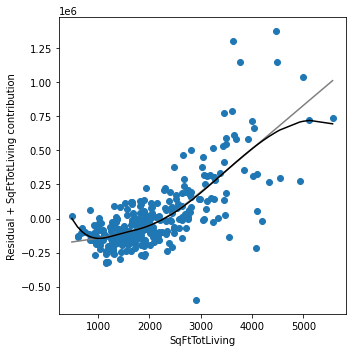

In [124]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()

### Generalized additive models

Suppose you suspect a nonlinear relationship between the response and a predictor variable. either by a prior knowledge or by examining the regression diagnostics. Polynomial terms may not be flexible enough to capture the relationship, and spline terms require specifying the knots. Generalized additive models, or GAM, are a flexible modeling technique that can be used to automatically fit a spline regression.

In [130]:
from pygam import LinearGAM, s, l
from pygam.datasets import wage

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

X = house_98105[predictors].values
y = house_98105[outcome]

gam = LinearGAM(s(0, n_splines = 12) + l(1) + l(2) + l(3) + l(4))
gam.gridsearch(X, y)
gam.summary()

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--/Users/boyuan/anaconda3/envs/sds/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1792: RuntimeWarning: overflow encountered in log
  place(output, cond, self._logpdf(*goodargs) - log(scale))
/Users/boyuan/anaconda3/envs/sds/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1792: RuntimeWarning: overflow encountered in log
  place(output, cond, self._logpdf(*goodargs) - log(scale))
/Users/boyuan/anaconda3/envs/sds/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1792: RuntimeWarning: overflow encountered in log
  place(output, cond, self._logpdf(*goodargs) - log(scale))
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:  00:00:00/Users/boyuan/anaconda3/envs/sds/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1792: RuntimeWarning: overflow encountered in log
  place(output, cond, self._logpdf(*goodargs) - log(scale))
/Users/boy

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      7.6772
Link Function:                     IdentityLink Log Likelihood:                                 -7833.1159
Number of Samples:                          313 AIC:                                            15683.5863
                                                AICc:                                             15684.14
                                                GCV:                                      30838885095.1708
                                                Scale:                                    29480381715.8322
                                                Pseudo R-Squared:                                   0.8117
Feature Function                  Lam

<ipython-input-130-5a8954951e89>:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
